In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
steam = pd.read_csv(r"C:/Users/Acer/Downloads/steam-200k.csv")
steam.head(10)

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
5,151603712,Fallout New Vegas,purchase,1.0,0
6,151603712,Fallout New Vegas,play,12.1,0
7,151603712,Left 4 Dead 2,purchase,1.0,0
8,151603712,Left 4 Dead 2,play,8.9,0
9,151603712,HuniePop,purchase,1.0,0


In [8]:
steam.columns

Index(['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0', '0'], dtype='object')

In [27]:
steam.rename(columns={'The Elder Scrolls V Skyrim':'game', 'purchase':'behavior','1.0':'hoursplay'}, inplace=True)

In [28]:
obs=steam['behavior'].to_list()

In [29]:
obs.count('purchase')

129510

In [30]:
obs.count('play')

70489

In [31]:
steam.max()

151603712           309903146
game         theHunter Primal
behavior             purchase
hoursplay             11754.0
0                           0
dtype: object

In [32]:
steam['hoursplay'].sort_values()

114969        0.1
92033         0.1
92031         0.1
36814         0.1
56283         0.1
           ...   
183460     6964.0
165595     7765.0
187004     9640.0
112642    10442.0
123725    11754.0
Name: hoursplay, Length: 199999, dtype: float64

In [33]:
steam.loc[123725]

151603712                      73017395
game         Sid Meier's Civilization V
behavior                           play
hoursplay                       11754.0
0                                     0
Name: 123725, dtype: object

In [34]:
steam.sample(10)

,151603712,game,behavior,hoursplay,0
84605,88035166,Castle Crashers,purchase,1.0,0
76943,86469479,Antisquad Tasks in North Korea. Tactics DLC,purchase,1.0,0
146287,103624897,Grand Theft Auto San Andreas,play,1.9,0
147464,47063596,Insurgency,purchase,1.0,0
31324,99077905,Hitman Absolution,play,0.5,0
70306,206183065,No More Room in Hell,play,7.8,0
64760,181010210,Neverwinter,play,5.0,0
169445,122094388,Empire Total War,purchase,1.0,0
163936,161816812,Left 4 Dead 2,play,4.6,0
30213,184807923,Unturned,purchase,1.0,0


In [35]:
steam=steam[steam.behavior != 'purchase']

In [40]:
steam.drop(labels=['151603712','0'],axis=1,inplace=True)

In [41]:
steam.describe()

,hoursplay
count,70489.000000
mean,48.878063
std,229.335236
min,0.100000
25%,1.000000
50%,4.500000
75%,19.100000
max,11754.000000


In [42]:
steam.isna().sum()

game         0
behavior     0
hoursplay    0
dtype: int64

In [43]:
steam = steam.groupby('game').sum().reset_index()
steam = steam.sort_values('hoursplay',ascending = False).reset_index(drop=True)

In [44]:
steam.head()

,game,hoursplay
0,Dota 2,981684.6
1,Counter-Strike Global Offensive,322771.6
2,Team Fortress 2,173673.3
3,Counter-Strike,134261.1
4,Sid Meier's Civilization V,99821.3


In [45]:
steam.shape

(3600, 2)

In [46]:
top=steam.loc[[0,1,2]]

In [47]:
outros=steam.loc[3:3600]

In [48]:
outros

,game,hoursplay
3,Counter-Strike,134261.1
4,Sid Meier's Civilization V,99821.3
5,Counter-Strike Source,96075.5
6,The Elder Scrolls V Skyrim,70889.3
7,Garry's Mod,49725.3
...,...,...
3595,Mr. Robot,0.1
3596,Guardians of Orion,0.1
3597,Your Doodles Are Bugged!,0.1
3598,The Fish Fillets 2,0.1


In [49]:
outros.describe()

,hoursplay
count,3597.000000
mean,546.910286
std,4128.505593
min,0.100000
25%,3.100000
50%,15.100000
75%,97.000000
max,134261.100000


In [50]:
outros['hoursplay'].sum()

1967236.2999999998

In [51]:
top

,game,hoursplay
0,Dota 2,981684.6
1,Counter-Strike Global Offensive,322771.6
2,Team Fortress 2,173673.3


In [52]:
novo_valor={'game':'Outros', 'hoursplay':'1967236.2'}

In [53]:
top = top.append(novo_valor, ignore_index=True)

In [54]:
top

,game,hoursplay
0,Dota 2,981684.6
1,Counter-Strike Global Offensive,322771.6
2,Team Fortress 2,173673.3
3,Outros,1967236.2


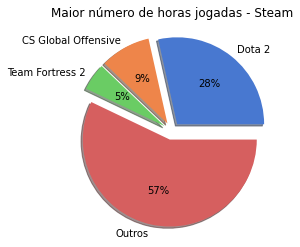

In [55]:
#define data
data = top['hoursplay']
labels = ['Dota 2', 'CS Global Offensive', 'Team Fortress 2', 'Outros']

#define Seaborn color palette to use
colors = sns.color_palette('muted')[0:5]

#create pie chart
Grafico=plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', shadow = True, explode = (0.1, 0.1, 0.1, 0.1))
plt.title('Maior número de horas jogadas - Steam')
plt.savefig('foo.jpg')
plt.show()

In [56]:
ablueblue=top.drop(labels=0,axis=0,inplace=True)
ablueblue

In [57]:
seq= list(range(1,10))
seq

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [58]:
teste=slice(3,5)

In [59]:
print(seq[teste])

[4, 5]


In [60]:
py_list = ['P', 'y', 't', 'h', 'o', 'n']
py_tuple = ('P', 'y', 't', 'h', 'o', 'n')

# contains indices -1, -2 and -3
slice_object = slice(-1, -4, -1) 
print(py_list[slice_object])  # ['n', 'o', 'h']

# contains indices -1 and -3
slice_object = slice(-1, -5, -2)
print(py_tuple[slice_object]) # ('n', 'h')

['n', 'o', 'h']
('n', 'h')


In [61]:
d='dente'[:2]
d

'de'